# London Roads Merge

This program serves as an inital data cleaning file. The aim here is to gather all original data used in this project and extract only the data required (specifically, all data within the Greater London region).

I will primarily use the GeoPandas library to load all data, converting each dataset to the OSGB (Ordnance Survey Great Britain) Coordinate Reference System, and then clip the data to retain only the features pertinent to my research.

I am handling OS green space area data (https://osdatahub.os.uk/downloads/open/OpenGreenspace) from tiles TQ and TL, which both encompass London. Additionally, I will be working with the UK OS roads map (https://osdatahub.os.uk/downloads/open/OpenRoads), sepcifically using their road link layer. These files will be compared against the London Borough boundary map from Government data (https://www.data.gov.uk/dataset/f4481b10-3618-4d87-ac84-22d8ee242878/london-boroughs)

The rationale for cleaning data in a separate file is the most suitable choice: the OS roads file is large (~2GB). By processing the data and extracting only the features mecessary for analysis and visualisation, I need to run this preprocessing script just once. This approach significantly reduces computational strain when executing the  analysis and visualisation program.

## Library and data file importing

In [1]:
# Import libraries to read and load geospatial files
import geopandas as gpd

In [ ]:
# Loading roads and london borough files
roads = gpd.read_file("Data/oproad_gpkg_gb/Data/oproad_gb.gpkg", layer="road_link")
london_boroughs = gpd.read_file("Data/london_boroughs/London_Boroughs.gpkg")


In [13]:
# Loading the Greenspace data tiles TL & TQ
greenspace_TL = gpd.read_file("Data/greenspace_data/opgrsp_essh_tl/OS Open Greenspace (ESRI Shape File) TL/data/TL_GreenspaceSite.shp")
greenspace_TQ = gpd.read_file("Data/greenspace_data/opgrsp_essh_tq/OS Open Greenspace (ESRI Shape File) TQ/data/TQ_GreenspaceSite.shp")

## Converting CRS of data to OSGB

In [ ]:
# Converting all data to the OSGC CRS
roads = roads.to_crs("EPSG:27700")
london_boroughs = london_boroughs.to_crs("EPSG:27700")
greenspace_TL = greenspace_TL.to_crs("EPSG:27700")
greenspace_TQ = greenspace_TQ.to_crs("EPSG:27700")

## Road data analysis

In [16]:
roads.columns

Index(['id', 'fictitious', 'road_classification', 'road_function',
       'form_of_way', 'road_classification_number', 'name_1', 'name_1_lang',
       'name_2', 'name_2_lang', 'road_structure', 'length', 'length_uom',
       'loop', 'primary_route', 'trunk_road', 'start_node', 'end_node',
       'road_number_toid', 'road_name_toid', 'geometry'],
      dtype='object')

In [17]:
roads.head()

,id,fictitious,road_classification,road_function,form_of_way,road_classification_number,name_1,name_1_lang,name_2,name_2_lang,...,length,length_uom,loop,primary_route,trunk_road,start_node,end_node,road_number_toid,road_name_toid,geometry
0,000000A5-D9A9-4DB4-A2F2-D7F6BCB35388,False,Unclassified,Local Road,Single Carriageway,None,Spring Park Avenue,None,None,None,...,41.0,m,False,False,False,602A2721-5157-4625-A244-2B49F7804F38,FD30A5AF-4D17-4E51-B6EA-EBABC0FAD7B5,None,osgb4000000030501029,"LINESTRING (535959 165684, 535953.5 165703.5, ..."
1,000000BA-5D39-4927-AB7A-CACB15A39289,False,Unclassified,Local Road,Single Carriageway,None,Brigandine Close,None,None,None,...,44.0,m,False,False,False,87C57FBA-F8A9-4144-8910-C9544FCC5C62,23A66550-A676-4ED8-A7E9-83F549CDB31D,None,osgb4000000007830632,"LINESTRING (451917 529999, 451904 529981, 4518..."
2,000001F8-D4BC-4C92-B739-AC3FE7315907,False,Unknown,Secondary Access Road,Single Carriageway,None,None,None,None,None,...,73.0,m,False,False,False,DF47785E-6667-4BAC-BFF9-D6D6CA542039,DD053FE8-1CAE-48F1-9C84-F8F4D9B58DB4,None,None,"LINESTRING (386323 409884.05, 386342.91 409895..."
3,00000547-9FAA-4B3F-A836-93551470109C,False,A Road,A Road,Single Carriageway,A4155,Marlow Road,None,None,None,...,65.0,m,False,False,False,46A52C02-E47D-449A-831E-BCB1033BEEE1,549493BA-92AB-4870-8CE2-B1553BA09386,osgb4000000023510405,osgb4000000023466195,"LINESTRING (488899 188022, 488876.5 188045.5, ..."
4,00000889-C931-4B0B-B126-D411A7029AD7,False,Unclassified,Local Road,Single Carriageway,None,Stoneleigh Way,None,None,None,...,67.0,m,False,False,False,DDAB7A21-1098-4ED4-9253-187AE4C60046,09DC61FF-F0D3-4800-B35D-6CEB28F6D5B5,None,osgb4000000011072944,"LINESTRING (431652.05 439469.93, 431664.9 4394..."


In [ ]:
# Check all road types available
roads['form_of_way'].unique()

array(['Single Carriageway', 'Collapsed Dual Carriageway', 'Roundabout',
       'Slip Road', 'Dual Carriageway', 'Shared Use Carriageway',
       'Guided Busway'], dtype=object)

## London boundary 

<Axes: >

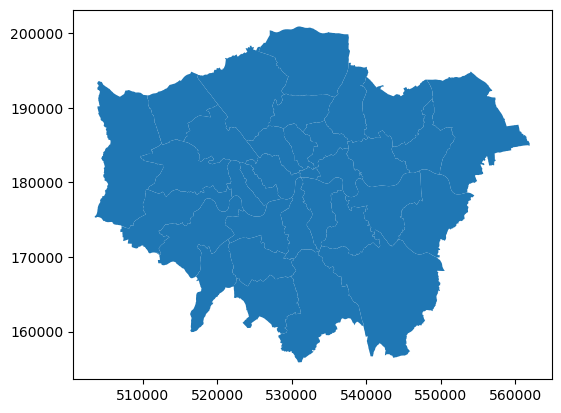

In [7]:
london_boroughs.plot()

London boroughs are present, dissolving to create 1 polygon


<Axes: >

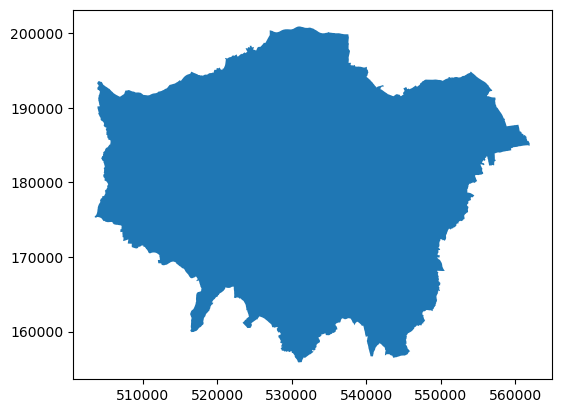

In [ ]:
# Combining all London boroughs to make one large London boundary
if len(london_boroughs) > 1:
    print("London boroughs are present, dissolving to create 1 polygon")
    london = london_boroughs.dissolve()
london.plot()

## Roads plot

<Axes: >

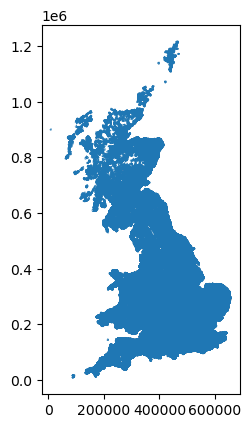

In [5]:
roads.plot()

## Road clipping to London boundary

In [35]:
# Clip roads to London boundary
london_roads = gpd.clip(roads, london)

[Text(0.5, 23.52222222222222, 'Easting'),
 Text(20.18091798621849, 0.5, 'Northing'),
 Text(0.5, 1.0, 'London Road Types')]

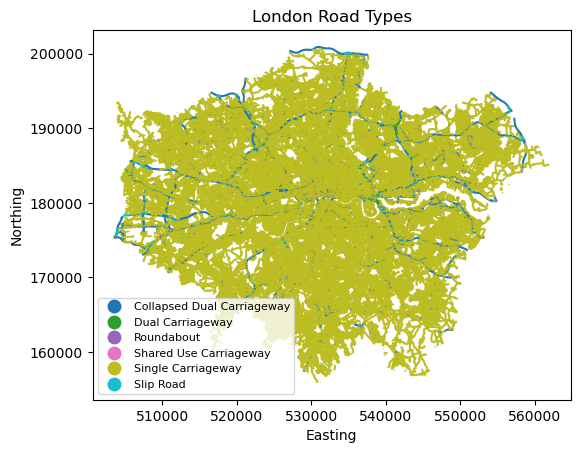

In [48]:
# Plotting London roads to see road types
london_road_plot = london_roads.plot(column='form_of_way', 
                                     legend=True,
                                     legend_kwds={'loc':'lower left',
                                                  'fontsize':8})
london_road_plot.set(xlabel="Easting", ylabel="Northing", title="London Road Types")

## Green space data

### TQ tile

In [ ]:
# Check TQ green space columns
greenspace_TQ.columns

Index(['id', 'function', 'distName1', 'distName2', 'distName3', 'distName4',
       'geometry'],
      dtype='object')

<Axes: >

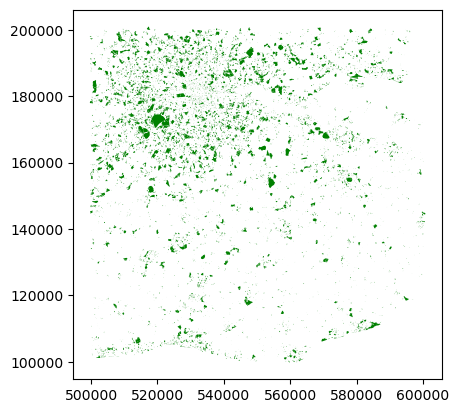

In [27]:
greenspace_TQ.plot(color='green')

### TL tile

In [39]:
# Check TQ green space columns
greenspace_TQ.columns

Index(['id', 'function', 'distName1', 'distName2', 'distName3', 'distName4',
       'geometry'],
      dtype='object')

<Axes: >

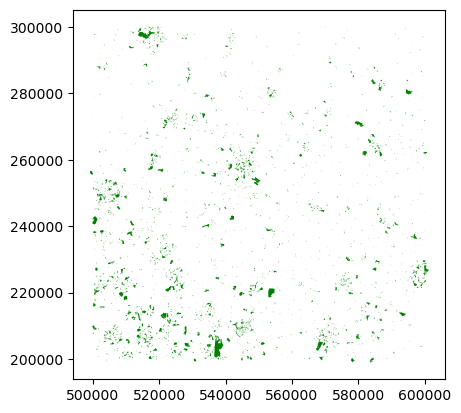

In [ ]:
greenspace_TL.plot(color='green')

In [ ]:
# Importing pandas for concat() function
import pandas as pd

In [ ]:
# Append TQ and TL green space tiles to become one plot
TQ_TL_tiles = pd.concat([greenspace_TQ, greenspace_TL])

<Axes: >

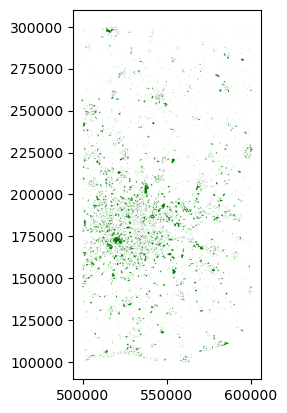

In [ ]:
# Plot combined green space
TQ_TL_tiles.plot(color='green')

In [37]:
# Clip green space to London boundary
london_green_space = gpd.clip(TQ_TL_tiles, london)

[Text(0.5, 23.52222222222222, 'Easting'),
 Text(20.561711197121, 0.5, 'Northing'),
 Text(0.5, 1.0, 'London Green Spaces')]

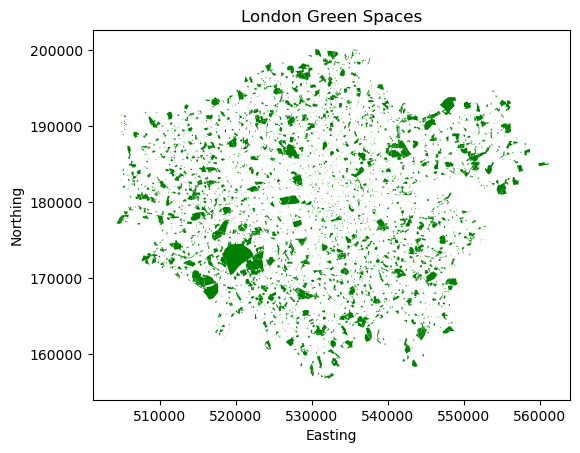

In [49]:
# Plot new London green space data
green_space_plot = london_green_space.plot(color='green')
green_space_plot.set(xlabel="Easting", ylabel="Northing", title="London Green Spaces")

# Extracting cleaned data

I am now extracting the data I have cleaned which will then be used for analysing London green space accessibility

In [52]:
# London green space data written to file
london_green_space.to_file('Data/clean-data/london_green_space.gpkg', driver='GPKG')

In [53]:
# London road data written to file
london_roads.to_file('Data/clean-data/london_roads.gpkg', driver='GPKG')

In [54]:
# London polygon data written to file
london.to_file('Data/clean-data/london.gpkg', driver='GPKG')